# 1. Problem Statement

Use basics understanding of Pandas,matplotlib and Seaborn and the basic commands of (EDA) which include cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis on 'New Car Sales' data Analyzing the car sales data with :
- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions

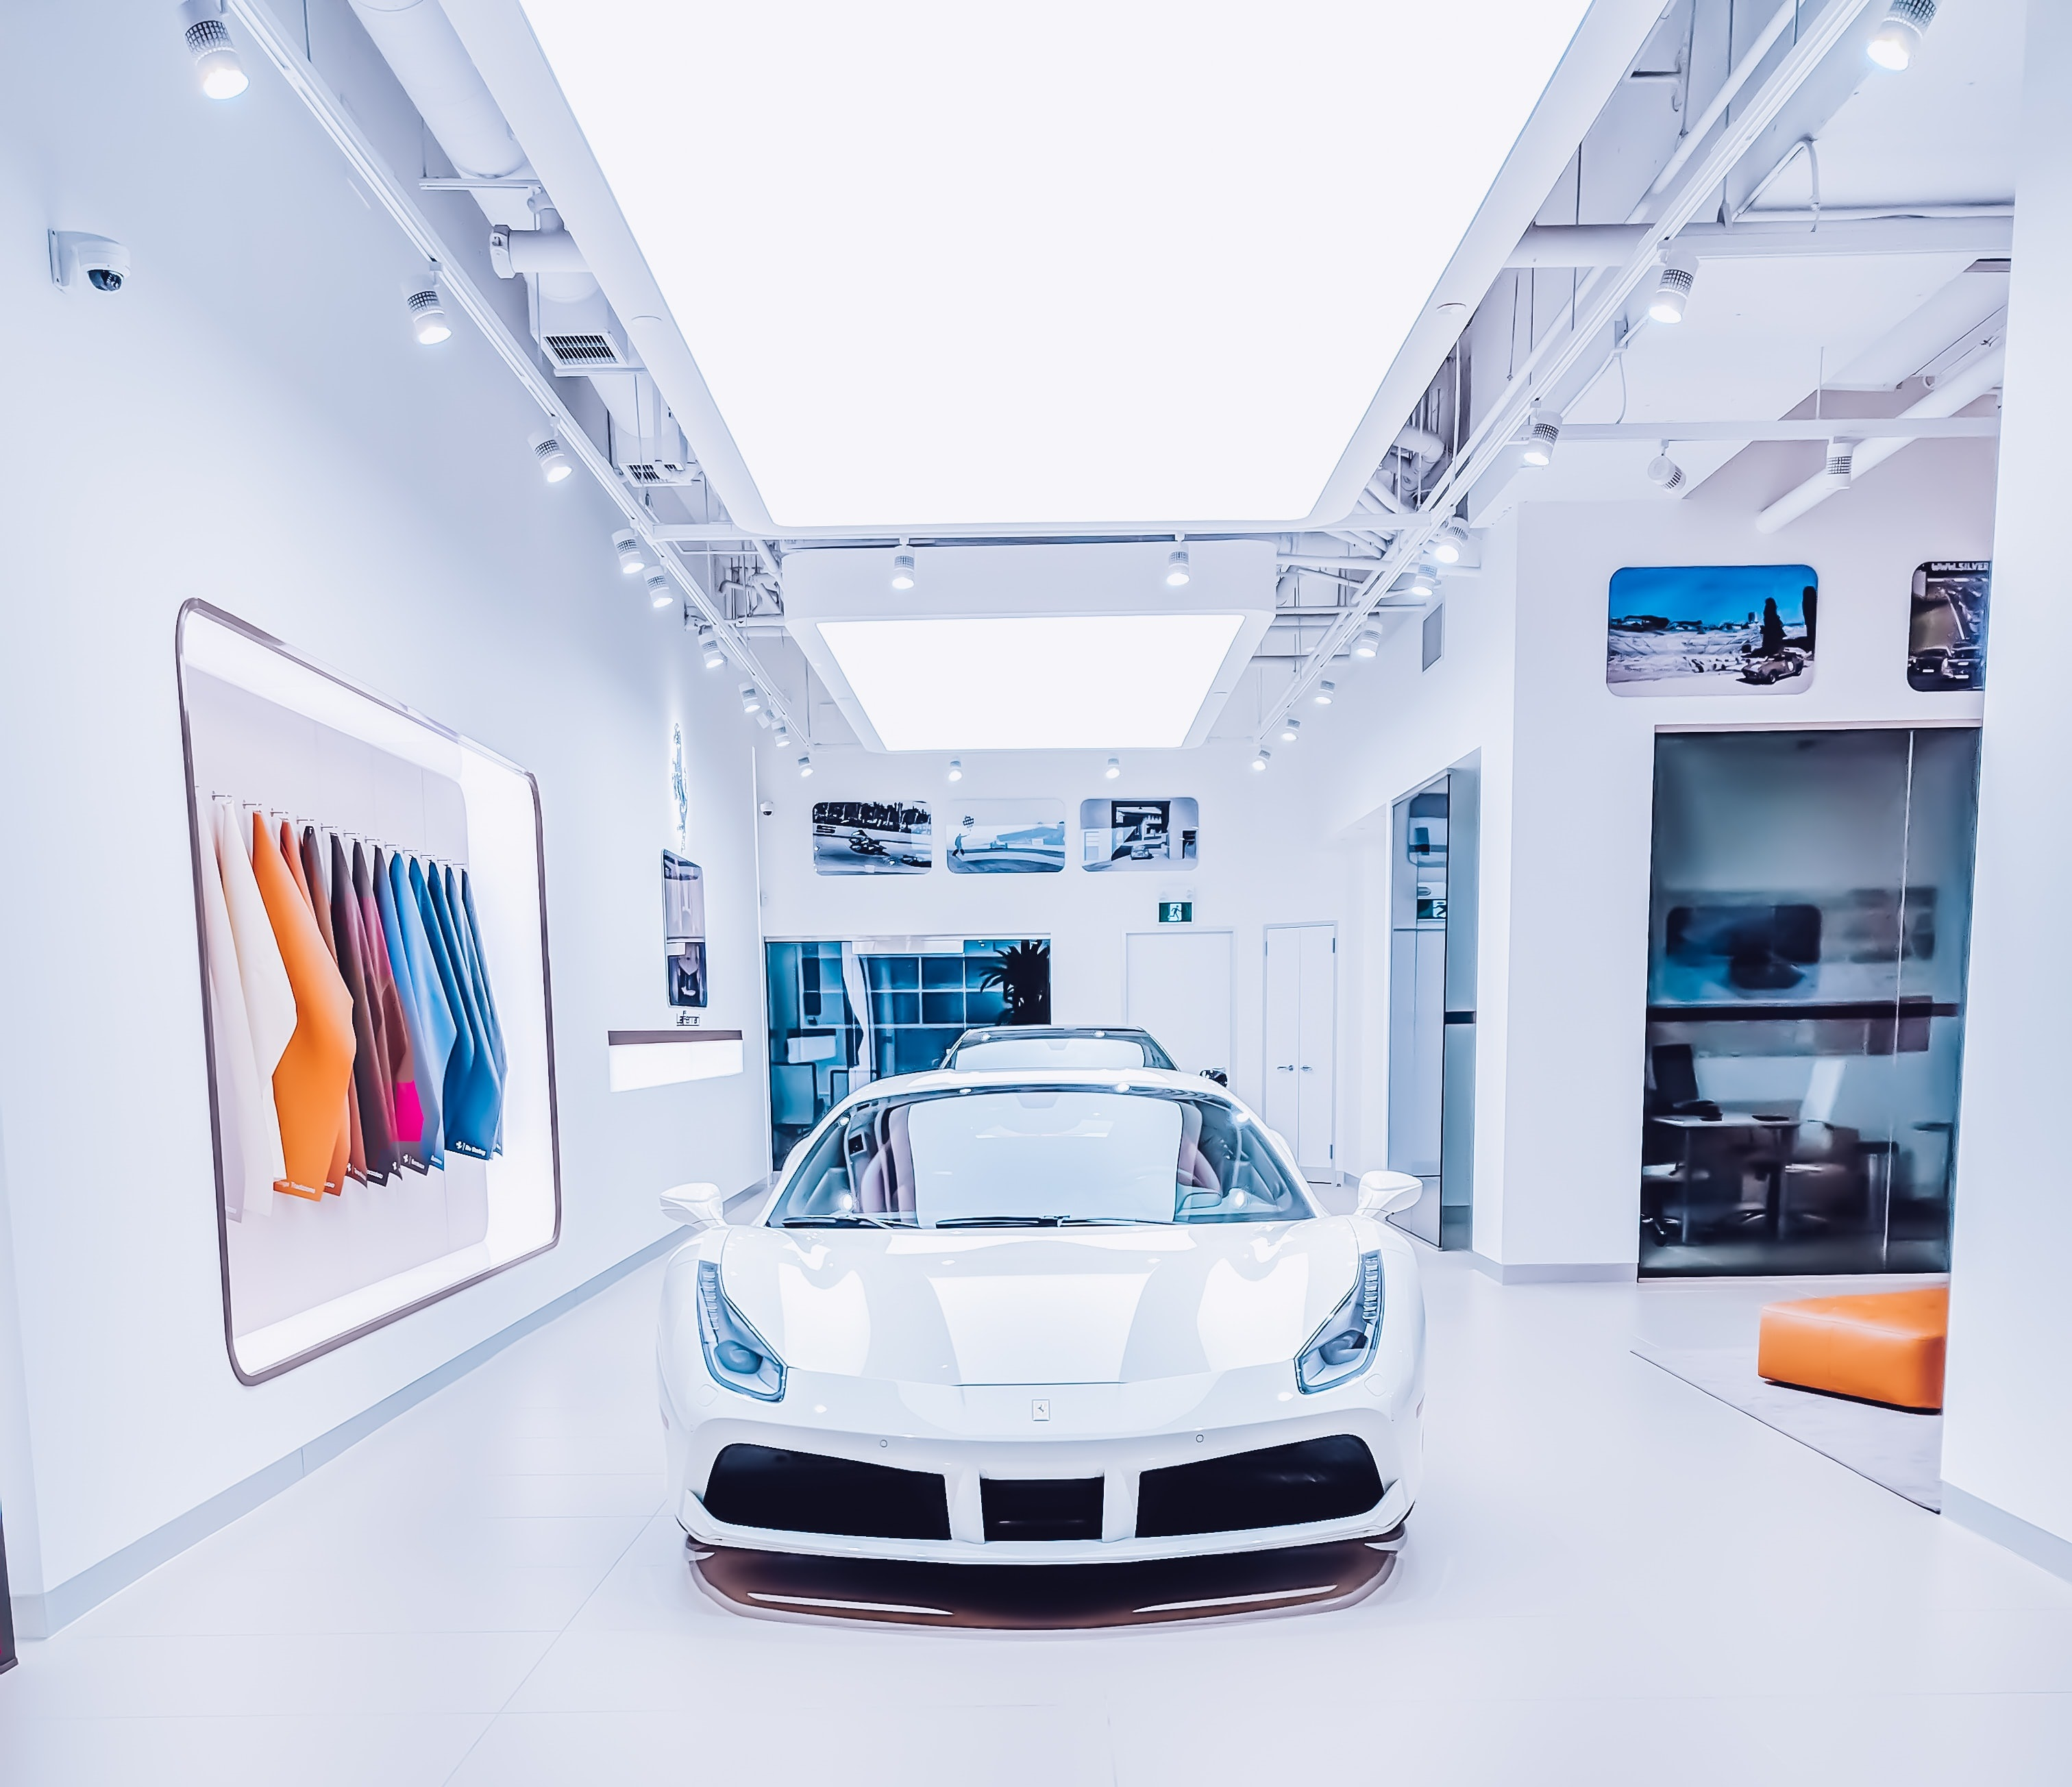

# 2. Importing packages
First step is importing important packages which we would be using for EDA. 

In [1]:
!conda install -y -c anaconda seaborn=0.9.0

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64:

The following NEW packages will be INSTALLED:

    blas:                   1.0-mkl               anaconda
    conda-package-handling: 1.7.2-py36h76e460a_0  anaconda
    tqdm:                   4.50.2-py_0           anaconda

The following packages will be UPDATED:

    anaconda:               5.0.0-py36hea9b2fc_0           --> custom-py36h363777c_0  anaconda
    conda:                  4.3.27-py36hcbae3bd_0          --> 4.9.0-py36_0           anaconda
    libpng:                 1.6.32-vc14hce43e6c_2          --> 1.6.32-vc14h5163883_3  anaconda [vc14]
    menuinst:               1.4.8-py36h870ab7d_0           --> 1.4.16-py36he774522_1  anaconda
    openssl:                1.0.2l-vc14hcac20b0_2          --> 1.0.2t-vc14h62dcd97_0  anaconda [vc14]
    pycosat:                0.6.2-py36hf17546d_1      

In [2]:
import numpy as np                     

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  # To apply seaborn styles to the plots.

!pip install plotly --upgrade

import plotly.graph_objs as go

  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
Exception:
Traceback (most recent call last):
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\shutil.py", line 544, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\program files (x86)\\microsoft visual studio\\shared\\anaconda3_64\\lib\\site-packages\\__pycache__\\six.cpython-36.pyc' -> 'C:\\Users\\Balaram\\AppData\\Local\\Temp\\pip-vcn3nton-uninstall\\program files (x86)\\microsoft visual studio\\shared\\anaconda3_64\\lib\\site-packages\\__pycache__\\six.cpython-36.pyc'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\basecommand.py", line 21

ModuleNotFoundError: No module named 'plotly'

# 3. Loading of Data
There is one data set of car sales that will be imported. 

Contains information about cars and related data items.

In [ ]:
car_sales=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='cp1252')
car_sales.head()

In [ ]:
car_sales

# 4. Description of dataset

- The dataset consists of information about different car sales over a period of time. Various variables present in the dataset include data of car, model, price, drive etc.
- The dataset comprises 9576 observations of 10 columns. Below is a table showing the names of all the columns and their description.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| car                            | Car brand name                                                                             | 
| model                          | Available car different Variants                                                           | 
| year                           | purchasing Year                                                                            | 
| body                           | Body type-Hatchback, Sedan, Crossover etc                                                  |
| mileage                        | car Mileage                                                                                |
| engV                           | Engine version                                                                             |
| engType                        | Car Fuel type - Petrol, Diesel, gas etc                                                    |
| drive                          | Wheel Drive Front, back                                                                    |
| registration                   | Check if the vehicle is registered                                                         |
| price                          | Price of Car in $                                                                          |

In [53]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **9576 samples (rows)** and **10 columns** in the dataframe.
  
  - There are **2 columns** with a **float** datatype, **6 columns** with an **object** datatype and **2 columns** with a **integer** datatype
  
  - There are **missing** values in **engV** and **drive** the data.
  
  We need to correct the missing values.

# 5. Data Profiling
We need to understand the outliers, missing values, and any extreme cases in the data. Accordingly, the data should be cleaned. This will help us get a better understanding out of the data given.

In [54]:
#missing data
total = car_sales.isnull().sum().sort_values(ascending=False)
percent = ((car_sales.isnull().sum()/car_sales.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
print(missing_data)

              Total   Percent
drive           511  5.336257
engV            434  4.532164
model             0  0.000000
year              0  0.000000
registration      0  0.000000
engType           0  0.000000
mileage           0  0.000000
body              0  0.000000
price             0  0.000000
car               0  0.000000


In [55]:
car_sales.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [10]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\balaram\appdata\roaming\python\python37\site-packages (2.9.0)


In [13]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(car_sales)

profile.to_file("car_sales_profiling.html")    

**The following are the observations from profiling**

- Car company has **High Cardinality**
    - Top 5 companies occupy **37.3%** of total share
    - Top 10 companies occupy **59.9%** of total share
    
- Price has too many **zeros**
    - Zero price cannot be an option. Hence this value should be removed from price column

- Milage has **3.6%** zeros and range of 999
    - Should remove **zero** values in milage as it is not valid
    - Should remove outliers and move the range to IQR max of **194**
    
- Engine has **4.5%** missing values and outliers present in both min and max values
    - Move the range to 5th-95th quanrantile - **1.3 - 4.6**
    - No need to remove missing values as they are no significant now
    
- Drive type has **5.3%** missing values - Not so significant

# 6. Data Cleaning

Data cleaning should be done before we move into further analysis

In [56]:
car_sales.drop(car_sales[car_sales['price']==0].index, inplace=True)

print(car_sales['price'].min())
print(car_sales['price'].max())

259.35
547800.0


Zeros in **price** column are deleted. Now the new min=**259.35** max=**547800**

In [57]:
print(car_sales['mileage'].min())
print(car_sales['mileage'].max())

0
999


In [58]:
car_sales.drop(car_sales[(car_sales['mileage']==0) | (car_sales['mileage']>194)].index, inplace=True)

print(car_sales['mileage'].min())
print(car_sales['mileage'].max())

1
194


The value for column **mileage** i set between **1 to 194**

In [59]:
car_sales.drop(car_sales[(car_sales['engV']<1.3) | (car_sales['engV']>4.6)].index, inplace=True)

print(car_sales['engV'].min())
print(car_sales['engV'].max())

1.3
4.6


**Engine Value** column is also set between required range.

Will run profiling once again to check for any abnormalities.

In [33]:
profile = pandas_profiling.ProfileReport(car_sales)

profile.to_file("car_sales_profiling2.html") 

Now we will replace the NaN values in **engV** and **drive** columns

- For engV, we will replace the values with **mode** of the values assuming it is the most occurring value
- For drive, we will replace **NaN** with **"Not Available"** as the missing values are distinct compared to other values. This will help in analysis of values

In [60]:
car_sales['engV'].mode()

0    2.0
dtype: float64

In [61]:
car_sales['engV'] = car_sales['engV'].fillna(car_sales['engV'].mode()[0])
print(car_sales['engV'].unique())

[ 2.5   1.8   2.    1.5   2.2   4.4   3.    2.4   2.8   3.5   1.9   3.6
  2.99  4.5   1.4   1.6   2.7   4.    3.8   3.2   3.7   4.6   4.2   1.3
  2.6   2.3   1.7   3.3   1.78  3.4   2.9   1.34  1.39  1.45  2.57  1.91
  1.33  2.49  1.36  2.14  4.3   2.69  2.44  1.35  2.46  2.28  1.31]


Replaced the values with **mode=2.0** assuming it is the most occuring value

In [62]:
car_sales['drive'] = car_sales['drive'].fillna('Not Available')
print(car_sales['drive'].unique())

['full' 'rear' 'front' 'Not Available']


Replaced **NaN** with **"Not Available"** as the missing values are distinct compared to other values. This will help in analysis of values.

Create new profiling report to check abnormalities.

In [42]:
profile = pandas_profiling.ProfileReport(car_sales)

profile.to_file("car_sales_profiling3.html") 

# 7. Data Analysis

With a satisfactory profiling report, we can proceed to the Analysis of data and finding patterns.

To start with, we will compare company name with other columns to observe specific patterns among any.

In [63]:
car_price_max=car_sales.groupby('price')
price_max=car_price_max['price','car','model','year','engV','body','drive'].max()
price_max

,price,car,model,year,engV,body,drive
price,,,,,,,
259.3500,259.3500,GAZ,21,1959,2.40,sedan,rear
280.0000,280.0000,Moskvich-AZLK,2140,1976,1.50,sedan,rear
350.0000,350.0000,Moskvich-AZLK,2140,1985,2.00,sedan,Not Available
389.0250,389.0250,VAZ,2102,1983,1.30,vagon,Not Available
400.0000,400.0000,ZAZ,968,1990,2.00,sedan,rear
460.0000,460.0000,VAZ,2101,1981,2.00,sedan,rear
463.1250,463.1250,VAZ,2101,1979,1.30,sedan,rear
507.5850,507.5850,VAZ,2101,1977,2.00,sedan,Not Available
537.2250,537.2250,VAZ,2105,1994,1.50,sedan,rear


Data given about the highest and least pricy cars. Shows the years and engine along with company name.

Observation from the table:
- **2/5** of the top 5 are **crossover** body type
- **3/5** of the top 5 are **full** engine type
- **4/5** have engine power more than **3.0**
___________________________________________________

- Lowest 5 cars are older than **1990**
- **4/5** have engine power less than **2.0**
- **3/5** are of **rear** engine type in lower 5
- **4/5** are of **sedan** type in lower 5

We will test out if these observations are valid for the whole data set.

**Check the observations with respect to price**

From the above observations, we now need to verify what major **type** in each column demand highest **price**

We compared price determinants in:
- Body type
- Drive type
- Engine type
- Year

In [64]:
car_sales.groupby(['body'])['price'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, cmap='inferno')

**Crossover** body type commanded highest price clearly occupying **28.9%**
This proves one of the observations made that highest priced cars are of **crossover** body type.

<AxesSubplot:ylabel='price'>

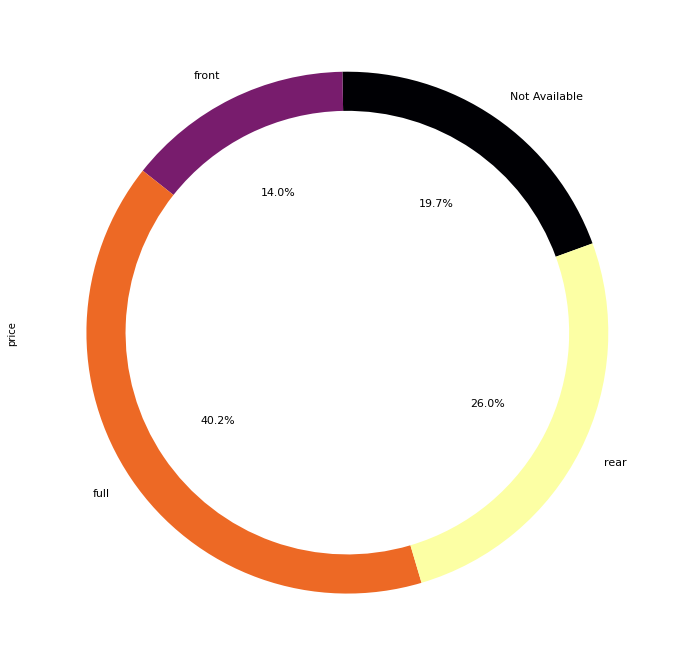

In [22]:
car_sales.groupby(['drive'])['price'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, cmap='inferno')

**Full** engine type clearly is the highest contributor to price which occupied **40.2%** of total share.

<AxesSubplot:ylabel='price'>

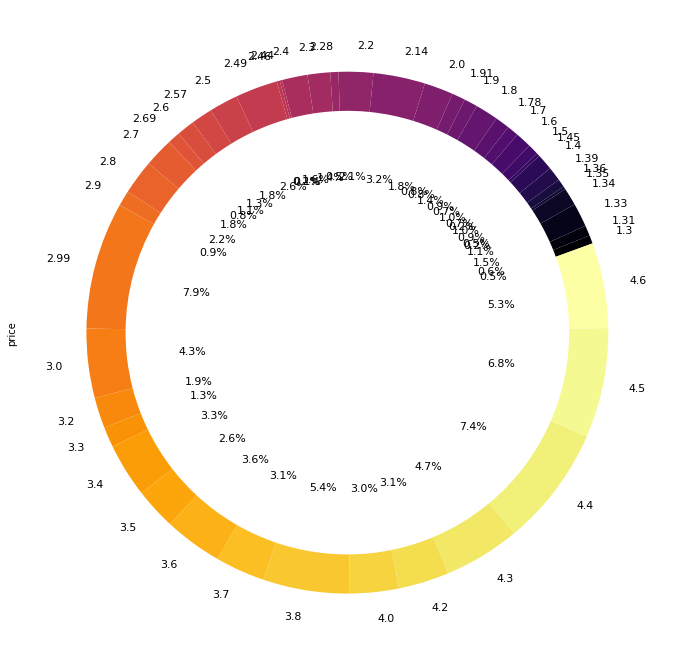

In [31]:
car_sales.groupby(['engV'])['price'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, cmap='inferno')

**Engine power** of more than **3.5**HP covers most of the market with respect to the price

<AxesSubplot:ylabel='price'>

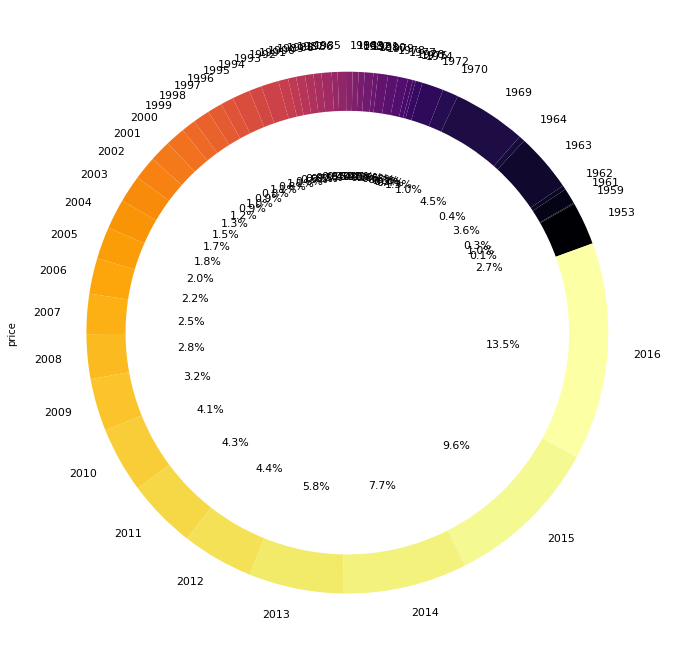

In [30]:
car_sales.groupby(['year'])['price'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, cmap='inferno')

Years post **2010** have highest price. This is understandable as latest cars demand more price.

Notable point is that **1963** & **1969** also occupy almost same share as 2010 which is an anomaly. There should be a reason for this to be happening.

**Observations:**

There seems to be a correlation between **Engine type** and **Year** to **Price**. To test this observation, let us do a correlation chart.

<AxesSubplot:>

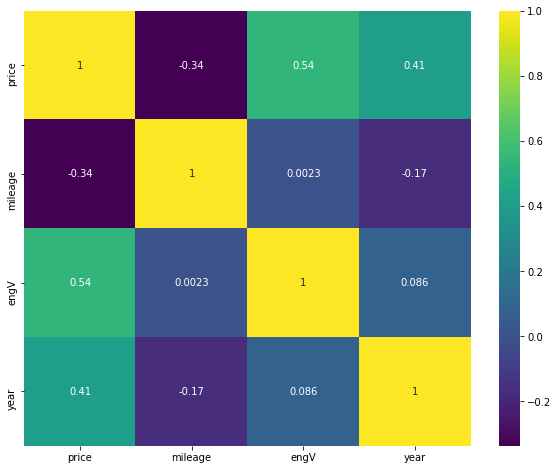

In [32]:
corr_mat = car_sales.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

**Correlations that are tested and results**:

- Price vs. engV - **0.54**
- Price vs. year - **0.41**

They show a good **positive** correlation which is in line with the observation. 

With increase in engV (engine capacity) and year, price increases.

It is time to see get observations over the years to see the trend and any anomaly in the trend over the years.

In [ ]:
sns.countplot(x='engType', data=car_sales, orient='h')
plt.title("Most preferred Engine Type used over the years")

**Petrol** is the most used type of **Engine** over the years

Text(0.5, 1.0, 'Most preferred body type used over the years')

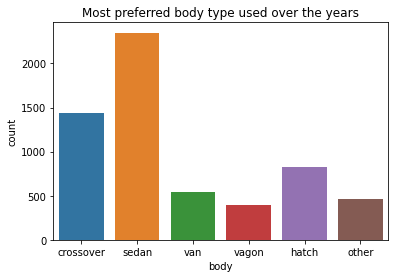

In [34]:
sns.countplot(x='body', data=car_sales, orient='h')
plt.title("Most preferred body type used over the years")

**Sedan** is the most used type of **Body type** over the years

Text(0.5, 1.0, 'Most preferred Drive type used over the years')

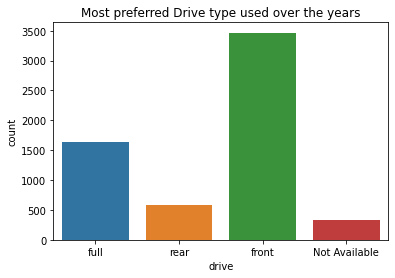

In [35]:
sns.countplot(x='drive', data=car_sales, orient='h')
plt.title("Most preferred Drive type used over the years")

**Front** is the most used type of **Engine type** over the years

To observe more if the trend of **highest demand** type over the years is of highest price. We do this to understand the value increase over the years of particular types and any abnormalities there of.

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=car_sales, y='price', x='year', hue='drive')
plt.title("Change of price of drive type over the years")

**<u>Comparision of drive type</u>**

There has been increase a expected, but there has been more increase in recent years post 2010. Let us zoom in to make more observations.

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

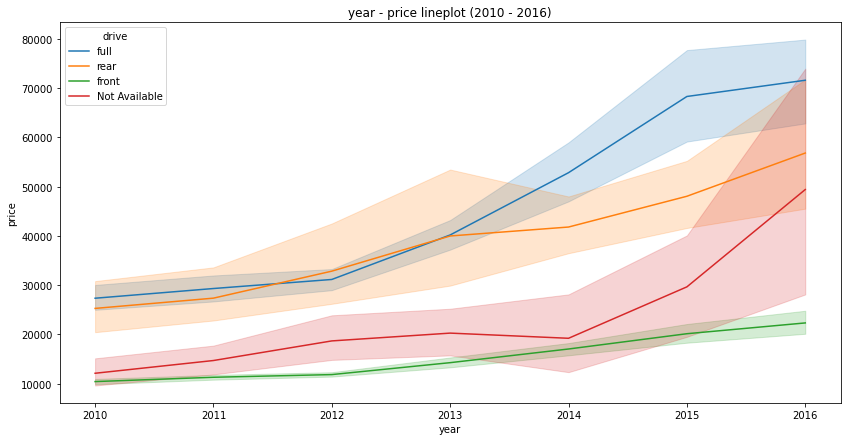

In [105]:
plt.figure(figsize=(14,7))
sns.lineplot(data=car_sales[car_sales.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

**<u>Comparision of drive type</u>**

**Front** type engine hasn't increased compared to Full & Rear. This is opposite to the total popularity trend over the years. This trend needs to be studied more.

In [68]:
plt.figure(figsize=(18,10))
sns.lineplot(data=car_sales, y='price', x='year', hue='body')
plt.title("Change of price over the years for Body type")

AttributeError: module 'seaborn' has no attribute 'lineplot'

**<u>Comparision of body type</u>**

There has been increase as expected, except the vagon type which has decreased price. 

Text(0.5, 1.0, 'Change of price over the years for Body type')

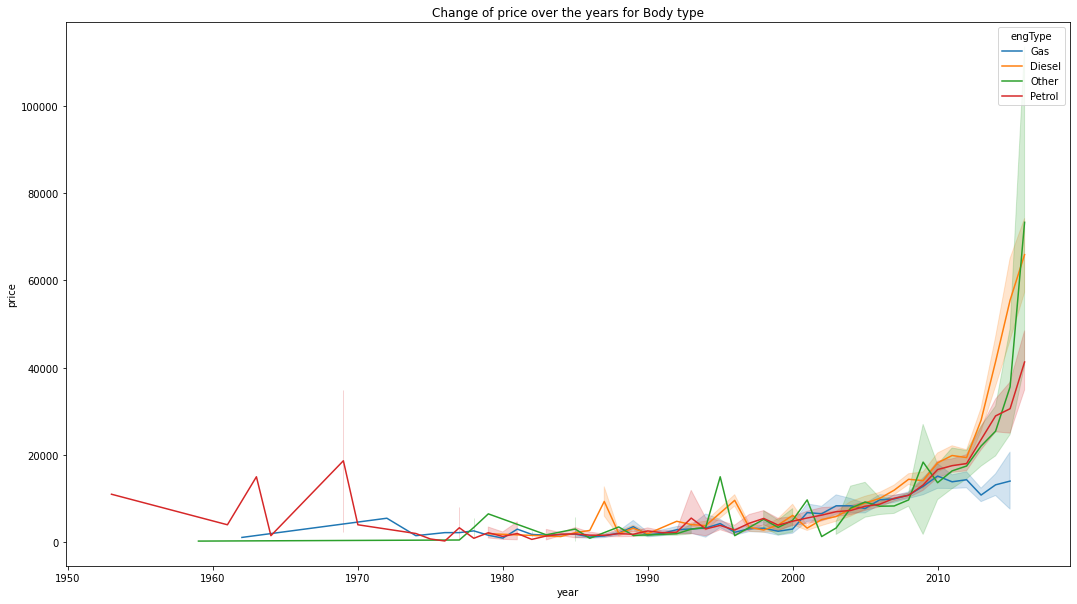

In [112]:
plt.figure(figsize=(18,10))
sns.lineplot(data=car_sales, y='price', x='year', hue='engType')
plt.title("Change of price over the years for Body type")

**<u>Comparision of engine type</u>**

Gas has remained same where as others have increased. **Other** engine type demand has spiked and this needs to be studied deep.

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

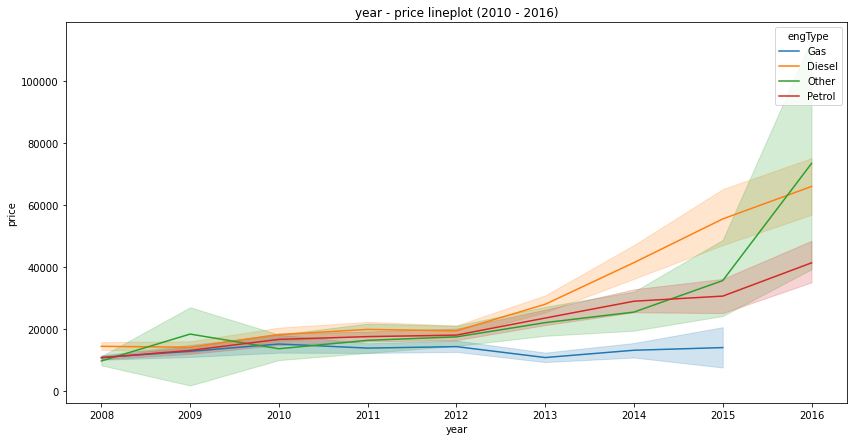

In [114]:
plt.figure(figsize=(14,7))
sns.lineplot(data=car_sales[car_sales.year >= 2008], y='price', x='year', hue='engType')
plt.title("year - price lineplot (2010 - 2016)")

**<u>Comparision of engine type</u>**

Gas has remained same where as others have increased. **Other** engine type demand has spiked and this needs to be studied deep.

Text(0.5, 1.0, 'Change of engine preference over the years')

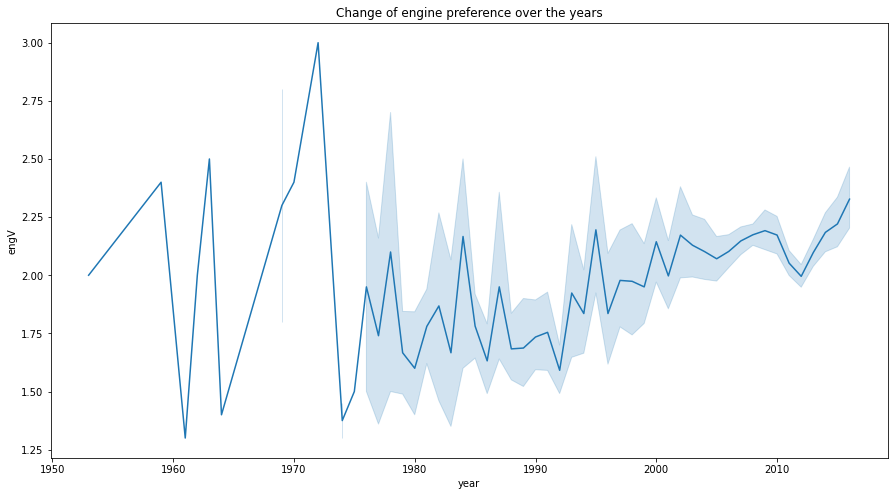

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(data=car_sales, y='engV', x='year')
plt.title("Change of engine preference over the years")

**<u>Change of preferred engine type over the years</u>**

This gives an idea of change of trend over the years for **Engine Power**. Post 2000's most preferred **Engine Power** is between **2 - 2.25 HP**

Text(0.5, 1.0, 'Change of price over the years')

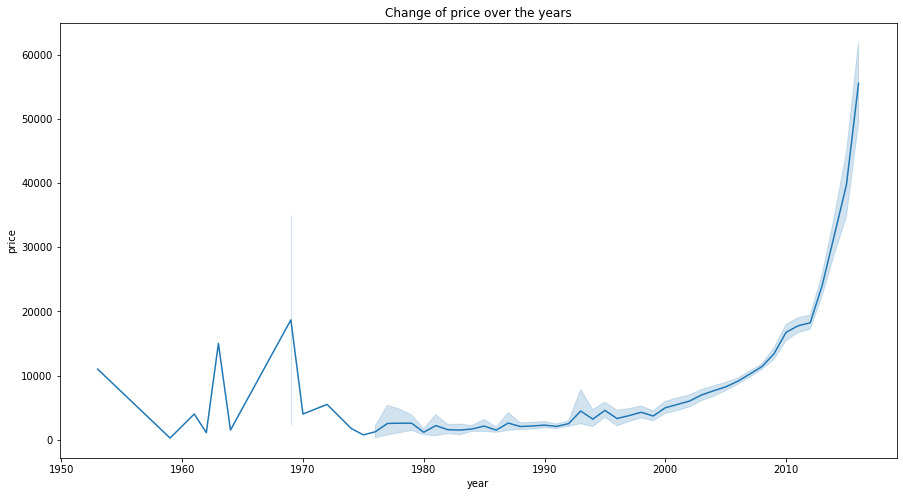

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=car_sales, y='price', x='year')
plt.title("Change of price over the years")

**<u>Change of price over the years</u>**

Price increases over the years. This is a common phenomenon which is proved with the plot, that said, there is a **spike** between **1960-1970**. This should be analysed a bit further to understand the factors that caused this.

Text(0.5, 1.0, 'Change of mileage over the years')

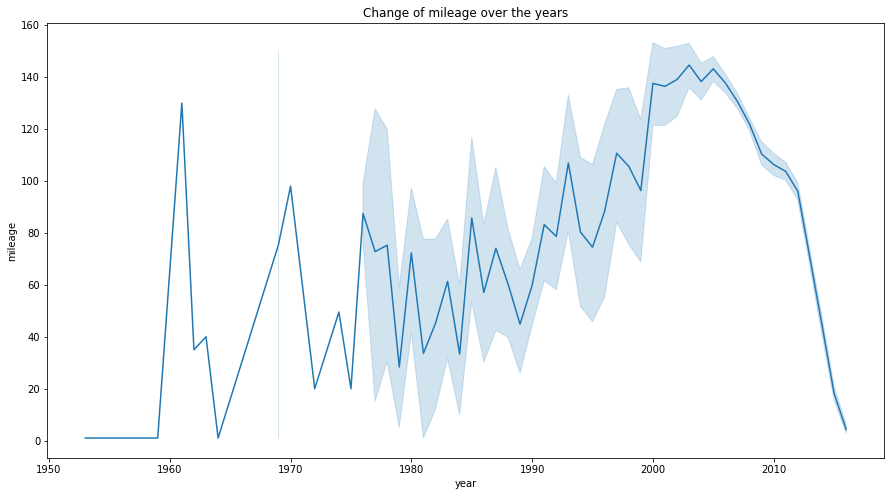

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(data=car_sales, y='mileage', x='year')
plt.title("Change of mileage over the years")

**<u>Change of mileage over the years</u>**

There is no observable trend over the years. But the mileage dramatically **increased and decreased** over the years post **2000's**. Can we dig a bit deep into the variables that could have caused this?

In [126]:
reg_max=car_sales.groupby('year')['registration'].value_counts().sort_values(ascending=False)
reg_max.head()

year  registration
2008  yes             943
2007  yes             662
2012  yes             648
2011  yes             579
2013  yes             556
Name: registration, dtype: int64

Year **2008** had highest registrations **943**

# 9. Conclusion

- There are 2 types of strategy that can be followed:
    - Price
    - Demand
- **Price Strategy** will help in selling pricy cars where company can sell fewer cars but get more money
- **Demand Strategy** will help sell more cars that are in demand in the market. This will make sales easy but should sell more number of units

**Price Strategy**
- Drive Type - Full
- Body Type - Crossover
- Engine power > 3.5 HP
- Cars post 2000's

Important factors which determine price - **Engine Power** & **Year**

**Demand Strategy**
- Drive Type - Front. But it is not increasing as expected.
- Engine Type - Petrol. **Other type** is increasing recently
- Body Type - Sedan. Demand for others types is also increasing over the years
- Engine power is between 2-2.25 HP
- Recent cars are of more demand

Anomalies & Assumptions:
- Mileage dramatically decreased post 2000's. Is this due to more EV adoption?
- 1960-1970 the price of cars spiked. This may be because the cars manufactured at this time are more valuable if modified.
